In [1]:
import arcpy

In [2]:
arcpy.env.workspace = r'C:\Users\thindle2016\OneDrive - Liberty University\geog650\data'
arcpy.env.overwriteOutput = True

In [3]:
#r = arcpy.Raster('VA_LUCampus_NAIP_Multispectral_20231013.tif')
r = arcpy.Raster('WA_Orchard_UAV_Multispectral_201910.tif')

print(r.spatialReference.name)
print(f'Dimensions: {r.height}, {r.width}, {r.bandCount}')
print(f'Cell size: {r.meanCellHeight:.2f} x {r.meanCellWidth:.2f}')
print(f'Unit: {r.spatialReference.linearUnitName}')
print(r.bandNames)

NAD_1983_StatePlane_Washington_South_FIPS_4602_Feet
Dimensions: 5885, 6477, 4
Cell size: 0.17 x 0.17
Unit: Foot_US
['Band_1', 'Band_2', 'Band_3', 'Band_4']


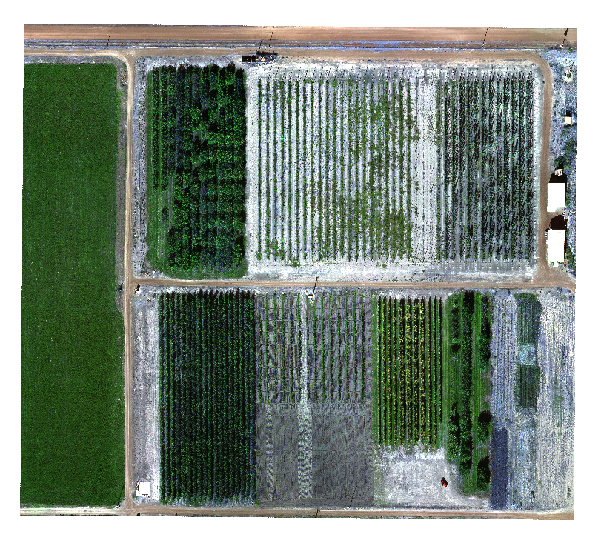

In [4]:
# Rendering natural color band combination with linear standard deviation stretch
rgb = arcpy.Render(r, {'bands': [1, 2, 3], 'numberOfStandardDeviations': 2})
rgb

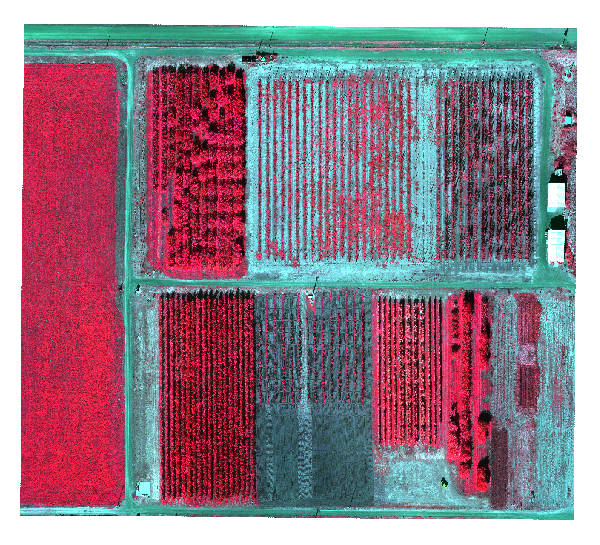

In [5]:
# Rendering natural color band combination
cir = arcpy.Render(r, {'bands': [4, 1, 2], 'numberOfStandardDeviations': 2})
cir

In [6]:
# Unpacking the list into four variables
red, green, blue, nir = r.getRasterBands()

In [7]:
def calculate_vegetation_index(nir_band, red_band):
    '''Calculates the Normalized Difference Vegetation Index (NDVI) and
    outputs values from -1.0 to 1.0 used to quantify vegetation greenness
    for understanding its density and health'''

    ndvi = (nir - red) / (nir + red)
    return ndvi

In [8]:
ndvi = calculate_vegetation_index(nir, red)

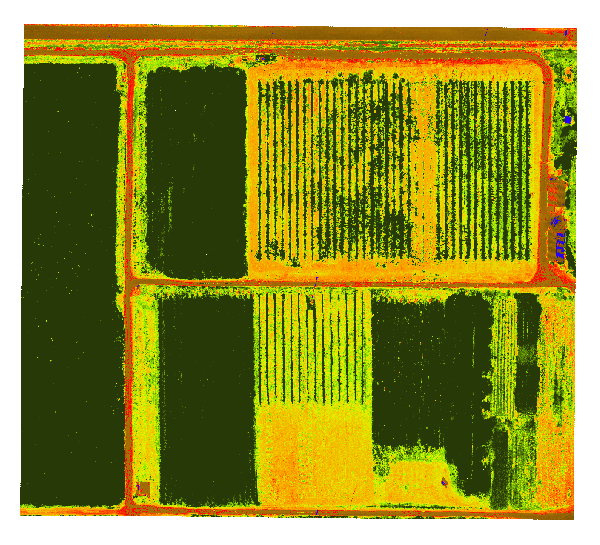

In [9]:
arcpy.Render(ndvi, {'min': -0.1, 'max': 1.0}, colormap='NDVI')

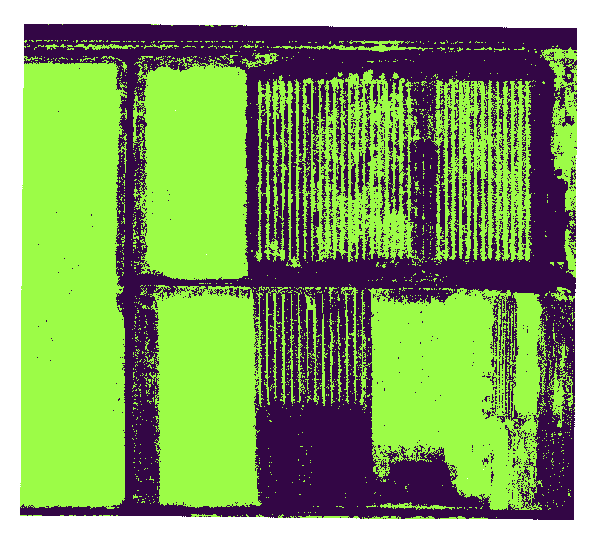

In [11]:
vegetation_mask = ((ndvi > 0.5) & (ndvi < 1.0))
vegetation_mask